In [37]:
%load_ext autoreload
%autoreload 2

In [29]:
%cd ..

/Users/a.bredikhin/PycharmProjects/RecSys-airi


In [135]:
train1 = pd.read_csv('data/train1level.csv')
test1 = pd.read_csv('data/test1level.csv')
holdout1 = pd.read_csv('data/holdout1level.csv')

In [136]:
items = train1.movieid.unique()
test1 = test1[test1.movieid.isin(items)]
users_test = test1.userid.unique()
holdout1 = holdout1[holdout1.userid.isin(users_test)]

In [138]:
from src.SASRec import train_sasrec, evaluate_sasrec

In [143]:
import omegaconf
cfg = omegaconf.OmegaConf.load('./config/config.yaml')

In [140]:
import torch.nn as nn
import torch

In [146]:
cfg.SASRec

{'model_params': {'hidden_units': 50, 'max_len': 200, 'dropout_rate': 0.2, 'num_blocks': 2, 'num_heads': 1}, 'batch_sampler_params': {'batch_size': 128, 'max_len': 200, 'seed': 10}, 'optimizer_params': {'lr': 0.001, 'weight_decay': 1e-05}, 'num_epoch': 60, 'model_save_path': './data/SASRec/SASRec.pt', 'device': 'cpu'}

In [147]:
model, losses = train_sasrec(train1, cfg)

2022-07-12 23:19:07.690 | INFO     | src.SASRec:train_sasrec:211 - start learning SASRec
 21%|███████▉                              | 99/472 [01:17<05:05,  1.22it/s]


 43%|███████████████▊                     | 201/472 [02:41<03:39,  1.23it/s]


 64%|███████████████████████▊             | 303/472 [04:04<02:15,  1.25it/s]


 86%|███████████████████████████████▋     | 405/472 [05:25<00:52,  1.29it/s]


100%|█████████████████████████████████████| 472/472 [06:18<00:00,  1.25it/s]
2022-07-12 23:25:39.287 | INFO     | src.SASRec:train_sasrec:240 - epoch: 0, loss: 2.0325233916104852
  7%|██▌                                   | 32/472 [00:25<05:51,  1.25it/s]


 28%|██████████▌                          | 134/472 [01:47<04:29,  1.25it/s]


 50%|██████████████████▌                  | 236/472 [03:08<03:06,  1.26it/s]


 72%|██████████████████████████▍          | 338/472 [04:30<01:47,  1.25it/s]


 93%|██████████████████████████████████▍  | 440/472 [05:51<00:25,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:16<00:00,  1.25it/s]
2022-07-12 23:31:56.200 | INFO     | src.SASRec:train_sasrec:240 - epoch: 1, loss: 0.7395775854840116
 14%|█████▍                                | 67/472 [00:52<05:20,  1.26it/s]


 36%|█████████████▏                       | 169/472 [02:11<03:55,  1.29it/s]


 57%|█████████████████████▏               | 271/472 [03:31<02:36,  1.29it/s]


 79%|█████████████████████████████▏       | 373/472 [04:51<01:16,  1.29it/s]


100%|█████████████████████████████████████| 472/472 [06:08<00:00,  1.28it/s]
2022-07-12 23:38:04.961 | INFO     | src.SASRec:train_sasrec:240 - epoch: 2, loss: 0.7022308445835518
  0%|                                               | 0/472 [00:00<?, ?it/s]


 22%|███████▉                             | 102/472 [01:20<04:48,  1.28it/s]


 43%|███████████████▉                     | 204/472 [02:39<03:28,  1.29it/s]


 65%|███████████████████████▉             | 306/472 [03:59<02:09,  1.29it/s]


 86%|███████████████████████████████▉     | 408/472 [05:19<00:49,  1.29it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-12 23:44:14.381 | INFO     | src.SASRec:train_sasrec:240 - epoch: 3, loss: 0.6975064434237399
  7%|██▊                                   | 35/472 [00:27<05:42,  1.28it/s]


 29%|██████████▋                          | 137/472 [01:47<04:24,  1.27it/s]


 51%|██████████████████▋                  | 239/472 [03:06<03:02,  1.27it/s]


 72%|██████████████████████████▋          | 341/472 [04:26<01:42,  1.28it/s]


 94%|██████████████████████████████████▋  | 443/472 [05:46<00:22,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-12 23:50:23.654 | INFO     | src.SASRec:train_sasrec:240 - epoch: 4, loss: 0.700056763649997
 15%|█████▋                                | 70/472 [00:54<05:13,  1.28it/s]


 36%|█████████████▍                       | 172/472 [02:14<03:55,  1.28it/s]


 58%|█████████████████████▍               | 274/472 [03:34<02:35,  1.27it/s]


 80%|█████████████████████████████▍       | 376/472 [04:54<01:15,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-12 23:56:33.419 | INFO     | src.SASRec:train_sasrec:240 - epoch: 5, loss: 0.6977352506275905
  1%|▏                                      | 3/472 [00:02<06:08,  1.27it/s]


 22%|████████▏                            | 105/472 [01:22<04:46,  1.28it/s]


 44%|████████████████▏                    | 207/472 [02:41<03:28,  1.27it/s]


 65%|████████████████████████▏            | 309/472 [04:02<02:07,  1.28it/s]


 87%|████████████████████████████████▏    | 411/472 [05:22<00:47,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 00:02:43.346 | INFO     | src.SASRec:train_sasrec:240 - epoch: 6, loss: 0.6983096268722566
  8%|███                                   | 38/472 [00:29<05:39,  1.28it/s]


 30%|██████████▉                          | 140/472 [01:49<04:19,  1.28it/s]


 51%|██████████████████▉                  | 242/472 [03:09<03:02,  1.26it/s]


 73%|██████████████████████████▉          | 344/472 [04:29<01:40,  1.27it/s]


 94%|██████████████████████████████████▉  | 446/472 [05:49<00:20,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 00:08:53.698 | INFO     | src.SASRec:train_sasrec:240 - epoch: 7, loss: 0.6978499020560313
 15%|█████▉                                | 73/472 [00:57<05:18,  1.25it/s]


 37%|█████████████▋                       | 175/472 [02:17<03:52,  1.28it/s]


 59%|█████████████████████▋               | 277/472 [03:37<02:32,  1.28it/s]


 80%|█████████████████████████████▋       | 379/472 [04:57<01:13,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 00:15:04.487 | INFO     | src.SASRec:train_sasrec:240 - epoch: 8, loss: 0.6967252580038572
  1%|▍                                      | 6/472 [00:04<06:05,  1.28it/s]


 23%|████████▍                            | 108/472 [01:25<04:46,  1.27it/s]


 44%|████████████████▍                    | 210/472 [02:45<03:28,  1.26it/s]


 66%|████████████████████████▍            | 312/472 [04:05<02:05,  1.28it/s]


 88%|████████████████████████████████▍    | 414/472 [05:26<00:47,  1.23it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 00:21:16.680 | INFO     | src.SASRec:train_sasrec:240 - epoch: 9, loss: 0.6940452216540353
  9%|███▎                                  | 41/472 [00:32<05:46,  1.25it/s]


 30%|███████████▏                         | 143/472 [01:51<04:16,  1.28it/s]


 52%|███████████████████▏                 | 245/472 [03:11<02:56,  1.28it/s]


 74%|███████████████████████████▏         | 347/472 [04:31<01:40,  1.24it/s]


 95%|███████████████████████████████████▏ | 449/472 [05:51<00:17,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 00:27:26.086 | INFO     | src.SASRec:train_sasrec:240 - epoch: 10, loss: 0.614795198885061
 16%|██████                                | 76/472 [00:59<05:07,  1.29it/s]


 38%|█████████████▉                       | 178/472 [02:18<03:47,  1.29it/s]


 59%|█████████████████████▉               | 280/472 [03:38<02:29,  1.29it/s]


 81%|█████████████████████████████▉       | 382/472 [04:57<01:10,  1.29it/s]


100%|█████████████████████████████████████| 472/472 [06:08<00:00,  1.28it/s]
2022-07-13 00:33:34.127 | INFO     | src.SASRec:train_sasrec:240 - epoch: 11, loss: 0.5839004676978466
  2%|▋                                      | 9/472 [00:07<06:01,  1.28it/s]


 24%|████████▋                            | 111/472 [01:26<04:45,  1.27it/s]


 45%|████████████████▋                    | 213/472 [02:46<03:21,  1.29it/s]


 67%|████████████████████████▋            | 315/472 [04:05<02:01,  1.29it/s]


 88%|████████████████████████████████▋    | 417/472 [05:25<00:42,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 00:39:43.240 | INFO     | src.SASRec:train_sasrec:240 - epoch: 12, loss: 0.5525398410983005
  9%|███▌                                  | 44/472 [00:34<05:39,  1.26it/s]


 31%|███████████▍                         | 146/472 [01:54<04:14,  1.28it/s]


 53%|███████████████████▍                 | 248/472 [03:14<02:55,  1.28it/s]


 74%|███████████████████████████▍         | 350/472 [04:34<01:36,  1.27it/s]


 96%|███████████████████████████████████▍ | 452/472 [05:55<00:15,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 00:45:54.113 | INFO     | src.SASRec:train_sasrec:240 - epoch: 13, loss: 0.5217507629323814
 17%|██████▎                               | 79/472 [01:02<05:10,  1.27it/s]


 38%|██████████████▏                      | 181/472 [02:22<03:50,  1.26it/s]


 60%|██████████████████████▏              | 283/472 [03:41<02:27,  1.28it/s]


 82%|██████████████████████████████▏      | 385/472 [05:01<01:07,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 00:52:04.079 | INFO     | src.SASRec:train_sasrec:240 - epoch: 14, loss: 0.5137437635054023
  3%|▉                                     | 12/472 [00:09<05:58,  1.28it/s]


 24%|████████▉                            | 114/472 [01:29<04:40,  1.28it/s]


 46%|████████████████▉                    | 216/472 [02:49<03:20,  1.28it/s]


 67%|████████████████████████▉            | 318/472 [04:09<02:00,  1.27it/s]


 89%|████████████████████████████████▉    | 420/472 [05:29<00:40,  1.29it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 00:58:14.476 | INFO     | src.SASRec:train_sasrec:240 - epoch: 15, loss: 0.5045617585843902
 10%|███▊                                  | 47/472 [00:36<05:30,  1.28it/s]


 32%|███████████▋                         | 149/472 [01:56<04:11,  1.28it/s]


 53%|███████████████████▋                 | 251/472 [03:15<02:52,  1.28it/s]


 75%|███████████████████████████▋         | 353/472 [04:35<01:33,  1.28it/s]


 96%|███████████████████████████████████▋ | 455/472 [05:55<00:13,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:08<00:00,  1.28it/s]
2022-07-13 01:04:23.469 | INFO     | src.SASRec:train_sasrec:240 - epoch: 16, loss: 0.4933786957950915
 17%|██████▌                               | 82/472 [01:03<05:03,  1.29it/s]


 39%|██████████████▍                      | 184/472 [02:23<03:45,  1.28it/s]


 61%|██████████████████████▍              | 286/472 [03:44<02:27,  1.26it/s]


 82%|██████████████████████████████▍      | 388/472 [05:04<01:05,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.28it/s]
2022-07-13 01:10:33.591 | INFO     | src.SASRec:train_sasrec:240 - epoch: 17, loss: 0.4722741368716046
  3%|█▏                                    | 15/472 [00:11<05:56,  1.28it/s]


 25%|█████████▏                           | 117/472 [01:31<04:37,  1.28it/s]


 46%|█████████████████▏                   | 219/472 [02:51<03:18,  1.27it/s]


 68%|█████████████████████████▏           | 321/472 [04:11<01:58,  1.27it/s]


 90%|█████████████████████████████████▏   | 423/472 [05:32<00:38,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:16:44.092 | INFO     | src.SASRec:train_sasrec:240 - epoch: 18, loss: 0.4490938571171235
 11%|████                                  | 50/472 [00:39<05:30,  1.28it/s]


 32%|███████████▉                         | 152/472 [01:59<04:11,  1.27it/s]


 54%|███████████████████▉                 | 254/472 [03:19<02:52,  1.26it/s]


 75%|███████████████████████████▉         | 356/472 [04:39<01:31,  1.27it/s]


 97%|███████████████████████████████████▉ | 458/472 [05:59<00:10,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:22:54.629 | INFO     | src.SASRec:train_sasrec:240 - epoch: 19, loss: 0.4362151726322659
 18%|██████▊                               | 85/472 [01:06<05:05,  1.27it/s]


 40%|██████████████▋                      | 187/472 [02:27<03:45,  1.27it/s]


 61%|██████████████████████▋              | 289/472 [03:47<02:23,  1.28it/s]


 83%|██████████████████████████████▋      | 391/472 [05:07<01:03,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:29:05.301 | INFO     | src.SASRec:train_sasrec:240 - epoch: 20, loss: 0.42142258565557206
  4%|█▍                                    | 18/472 [00:14<05:56,  1.27it/s]


 25%|█████████▍                           | 120/472 [01:33<04:37,  1.27it/s]


 47%|█████████████████▍                   | 222/472 [02:53<03:15,  1.28it/s]


 69%|█████████████████████████▍           | 324/472 [04:13<01:56,  1.27it/s]


 90%|█████████████████████████████████▍   | 426/472 [05:33<00:35,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 01:35:14.519 | INFO     | src.SASRec:train_sasrec:240 - epoch: 21, loss: 0.40928742908320187
 11%|████▎                                 | 53/472 [00:41<05:28,  1.27it/s]


 33%|████████████▏                        | 155/472 [02:01<04:07,  1.28it/s]


 54%|████████████████████▏                | 257/472 [03:21<02:48,  1.28it/s]


 76%|████████████████████████████▏        | 359/472 [04:41<01:28,  1.27it/s]


 98%|████████████████████████████████████▏| 461/472 [06:01<00:08,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:09<00:00,  1.28it/s]
2022-07-13 01:41:24.241 | INFO     | src.SASRec:train_sasrec:240 - epoch: 22, loss: 0.39904909751425355
 19%|███████                               | 88/472 [01:09<05:00,  1.28it/s]


 40%|██████████████▉                      | 190/472 [02:29<03:40,  1.28it/s]


 62%|██████████████████████▉              | 292/472 [03:49<02:21,  1.27it/s]


 83%|██████████████████████████████▉      | 394/472 [05:09<01:01,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:47:34.858 | INFO     | src.SASRec:train_sasrec:240 - epoch: 23, loss: 0.39347552059818125
  4%|█▋                                    | 21/472 [00:16<05:57,  1.26it/s]


 26%|█████████▋                           | 123/472 [01:36<04:32,  1.28it/s]


 48%|█████████████████▋                   | 225/472 [02:56<03:16,  1.26it/s]


 69%|█████████████████████████▋           | 327/472 [04:16<01:54,  1.27it/s]


 91%|█████████████████████████████████▋   | 429/472 [05:37<00:33,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:53:45.818 | INFO     | src.SASRec:train_sasrec:240 - epoch: 24, loss: 0.38325949669894527
 12%|████▌                                 | 56/472 [00:44<05:24,  1.28it/s]


 33%|████████████▍                        | 158/472 [02:04<04:04,  1.29it/s]


 55%|████████████████████▍                | 260/472 [03:24<02:46,  1.28it/s]


 77%|████████████████████████████▍        | 362/472 [04:44<01:26,  1.28it/s]


 98%|████████████████████████████████████▎| 464/472 [06:04<00:06,  1.24it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 01:59:56.831 | INFO     | src.SASRec:train_sasrec:240 - epoch: 25, loss: 0.37962698765983016
 19%|███████▎                              | 91/472 [01:11<05:00,  1.27it/s]


 41%|███████████████▏                     | 193/472 [02:31<03:39,  1.27it/s]


 62%|███████████████████████▏             | 295/472 [03:52<02:23,  1.23it/s]


 84%|███████████████████████████████      | 397/472 [05:12<00:58,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:06:07.869 | INFO     | src.SASRec:train_sasrec:240 - epoch: 26, loss: 0.3727310402792389
  5%|█▉                                    | 24/472 [00:18<05:44,  1.30it/s]


 27%|█████████▉                           | 126/472 [01:39<04:32,  1.27it/s]


 48%|█████████████████▊                   | 228/472 [02:59<03:11,  1.28it/s]


 70%|█████████████████████████▊           | 330/472 [04:19<01:51,  1.28it/s]


 92%|█████████████████████████████████▊   | 432/472 [05:39<00:31,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:12:19.215 | INFO     | src.SASRec:train_sasrec:240 - epoch: 27, loss: 0.36301699747978633
 12%|████▊                                 | 59/472 [00:46<05:25,  1.27it/s]


 34%|████████████▌                        | 161/472 [02:06<04:04,  1.27it/s]


 56%|████████████████████▌                | 263/472 [03:26<02:45,  1.26it/s]


 77%|████████████████████████████▌        | 365/472 [04:47<01:24,  1.27it/s]


 99%|████████████████████████████████████▌| 467/472 [06:07<00:03,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:18:30.417 | INFO     | src.SASRec:train_sasrec:240 - epoch: 28, loss: 0.35607833623633545
 20%|███████▌                              | 94/472 [01:13<04:57,  1.27it/s]


 42%|███████████████▎                     | 196/472 [02:34<03:37,  1.27it/s]


 63%|███████████████████████▎             | 298/472 [03:54<02:16,  1.27it/s]


 85%|███████████████████████████████▎     | 400/472 [05:14<00:57,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:24:42.104 | INFO     | src.SASRec:train_sasrec:240 - epoch: 29, loss: 0.3511917627085063
  6%|██▏                                   | 27/472 [00:21<05:55,  1.25it/s]


 27%|██████████                           | 129/472 [01:41<04:33,  1.26it/s]


 49%|██████████████████                   | 231/472 [03:02<03:07,  1.28it/s]


 71%|██████████████████████████           | 333/472 [04:22<01:49,  1.27it/s]


 92%|██████████████████████████████████   | 435/472 [05:42<00:29,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:30:53.829 | INFO     | src.SASRec:train_sasrec:240 - epoch: 30, loss: 0.34653815671296445
 13%|████▉                                 | 62/472 [00:48<05:18,  1.29it/s]


 35%|████████████▊                        | 164/472 [02:08<04:01,  1.28it/s]


 56%|████████████████████▊                | 266/472 [03:29<02:42,  1.27it/s]


 78%|████████████████████████████▊        | 368/472 [04:49<01:21,  1.27it/s]


100%|████████████████████████████████████▊| 470/472 [06:10<00:01,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:37:05.607 | INFO     | src.SASRec:train_sasrec:240 - epoch: 31, loss: 0.3436151730307078
 21%|███████▊                              | 97/472 [01:16<04:55,  1.27it/s]


 42%|███████████████▌                     | 199/472 [02:36<03:34,  1.27it/s]


 64%|███████████████████████▌             | 301/472 [03:56<02:16,  1.25it/s]


 85%|███████████████████████████████▌     | 403/472 [05:17<00:53,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:43:17.265 | INFO     | src.SASRec:train_sasrec:240 - epoch: 32, loss: 0.33672581714088634
  6%|██▍                                   | 30/472 [00:23<05:46,  1.28it/s]


 28%|██████████▎                          | 132/472 [01:43<04:29,  1.26it/s]


 50%|██████████████████▎                  | 234/472 [03:04<03:06,  1.27it/s]


 71%|██████████████████████████▎          | 336/472 [04:24<01:46,  1.27it/s]


 93%|██████████████████████████████████▎  | 438/472 [05:44<00:26,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:49:28.879 | INFO     | src.SASRec:train_sasrec:240 - epoch: 33, loss: 0.3321751893450648
 14%|█████▏                                | 65/472 [00:51<05:20,  1.27it/s]


 35%|█████████████                        | 167/472 [02:11<03:59,  1.27it/s]


 57%|█████████████████████                | 269/472 [03:31<02:40,  1.26it/s]


 79%|█████████████████████████████        | 371/472 [04:52<01:18,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 02:55:40.600 | INFO     | src.SASRec:train_sasrec:240 - epoch: 34, loss: 0.3268596623408592


 21%|███████▊                             | 100/472 [01:19<04:54,  1.27it/s]


 43%|███████████████▊                     | 202/472 [02:39<03:33,  1.26it/s]


 64%|███████████████████████▊             | 304/472 [04:00<02:12,  1.27it/s]


 86%|███████████████████████████████▊     | 406/472 [05:21<00:52,  1.25it/s]


100%|█████████████████████████████████████| 472/472 [06:13<00:00,  1.26it/s]
2022-07-13 03:01:54.086 | INFO     | src.SASRec:train_sasrec:240 - epoch: 35, loss: 0.3216067620126878
  7%|██▋                                   | 33/472 [00:26<05:50,  1.25it/s]


 29%|██████████▌                          | 135/472 [01:47<04:25,  1.27it/s]


 50%|██████████████████▌                  | 237/472 [03:07<03:06,  1.26it/s]


 72%|██████████████████████████▌          | 339/472 [04:28<01:44,  1.27it/s]


 93%|██████████████████████████████████▌  | 441/472 [05:49<00:24,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:13<00:00,  1.26it/s]
2022-07-13 03:08:07.276 | INFO     | src.SASRec:train_sasrec:240 - epoch: 36, loss: 0.320025492143833
 14%|█████▍                                | 68/472 [00:53<05:23,  1.25it/s]


 36%|█████████████▎                       | 170/472 [02:14<03:59,  1.26it/s]


 58%|█████████████████████▎               | 272/472 [03:34<02:37,  1.27it/s]


 79%|█████████████████████████████▎       | 374/472 [04:55<01:17,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:13<00:00,  1.27it/s]
2022-07-13 03:14:20.309 | INFO     | src.SASRec:train_sasrec:240 - epoch: 37, loss: 0.3157066956036172
  0%|                                       | 1/472 [00:00<06:09,  1.27it/s]


 22%|████████                             | 103/472 [01:21<04:49,  1.27it/s]


 43%|████████████████                     | 205/472 [02:41<03:30,  1.27it/s]


 65%|████████████████████████             | 307/472 [04:02<02:10,  1.26it/s]


 87%|████████████████████████████████     | 409/472 [05:22<00:49,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 03:20:32.588 | INFO     | src.SASRec:train_sasrec:240 - epoch: 38, loss: 0.31396341311224435
  8%|██▉                                   | 36/472 [00:28<05:46,  1.26it/s]


 29%|██████████▊                          | 138/472 [01:48<04:21,  1.28it/s]


 51%|██████████████████▊                  | 240/472 [03:08<03:02,  1.27it/s]


 72%|██████████████████████████▊          | 342/472 [04:28<01:42,  1.26it/s]


 94%|██████████████████████████████████▊  | 444/472 [05:49<00:22,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 03:26:43.876 | INFO     | src.SASRec:train_sasrec:240 - epoch: 39, loss: 0.3117472315364975
 15%|█████▋                                | 71/472 [00:55<05:15,  1.27it/s]


 37%|█████████████▌                       | 173/472 [02:16<03:55,  1.27it/s]


 58%|█████████████████████▌               | 275/472 [03:36<02:35,  1.27it/s]


 80%|█████████████████████████████▌       | 377/472 [04:57<01:14,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 03:32:56.229 | INFO     | src.SASRec:train_sasrec:240 - epoch: 40, loss: 0.30882317983245444
  1%|▎                                      | 4/472 [00:03<06:09,  1.27it/s]


 22%|████████▎                            | 106/472 [01:23<04:45,  1.28it/s]


 44%|████████████████▎                    | 208/472 [02:43<03:30,  1.25it/s]


 66%|████████████████████████▎            | 310/472 [04:04<02:07,  1.27it/s]


 87%|████████████████████████████████▎    | 412/472 [05:24<00:47,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 03:39:08.550 | INFO     | src.SASRec:train_sasrec:240 - epoch: 41, loss: 0.3066501823269715
  8%|███▏                                  | 39/472 [00:30<05:39,  1.27it/s]


 30%|███████████                          | 141/472 [01:50<04:19,  1.28it/s]


 51%|███████████████████                  | 243/472 [03:11<03:00,  1.27it/s]


 73%|███████████████████████████          | 345/472 [04:31<01:39,  1.27it/s]


 95%|███████████████████████████████████  | 447/472 [05:51<00:19,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 03:45:20.118 | INFO     | src.SASRec:train_sasrec:240 - epoch: 42, loss: 0.30433595950825737
 16%|█████▉                                | 74/472 [00:58<05:12,  1.27it/s]


 37%|█████████████▊                       | 176/472 [02:18<03:53,  1.27it/s]


 59%|█████████████████████▊               | 278/472 [03:39<02:32,  1.28it/s]


 81%|█████████████████████████████▊       | 380/472 [04:59<01:12,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 03:51:32.654 | INFO     | src.SASRec:train_sasrec:240 - epoch: 43, loss: 0.3041412928851984
  1%|▌                                      | 7/472 [00:05<06:06,  1.27it/s]


 23%|████████▌                            | 109/472 [01:26<04:45,  1.27it/s]


 45%|████████████████▌                    | 211/472 [02:46<03:26,  1.26it/s]


 66%|████████████████████████▌            | 313/472 [04:07<02:05,  1.27it/s]


 88%|████████████████████████████████▌    | 415/472 [05:27<00:44,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 03:57:45.190 | INFO     | src.SASRec:train_sasrec:240 - epoch: 44, loss: 0.30232988424220325
  9%|███▍                                  | 42/472 [00:33<05:36,  1.28it/s]


 31%|███████████▎                         | 144/472 [01:53<04:17,  1.27it/s]


 52%|███████████████████▎                 | 246/472 [03:13<02:56,  1.28it/s]


 74%|███████████████████████████▎         | 348/472 [04:34<01:38,  1.26it/s]


 95%|███████████████████████████████████▎ | 450/472 [05:54<00:17,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 04:03:56.667 | INFO     | src.SASRec:train_sasrec:240 - epoch: 45, loss: 0.30260783004558695
 16%|██████▏                               | 77/472 [01:00<05:10,  1.27it/s]


 38%|██████████████                       | 179/472 [02:21<03:50,  1.27it/s]


 60%|██████████████████████               | 281/472 [03:41<02:30,  1.27it/s]


 81%|██████████████████████████████       | 383/472 [05:02<01:10,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:10:09.207 | INFO     | src.SASRec:train_sasrec:240 - epoch: 46, loss: 0.30010185857950633
  2%|▊                                     | 10/472 [00:07<06:03,  1.27it/s]


 24%|████████▊                            | 112/472 [01:28<04:45,  1.26it/s]


 45%|████████████████▊                    | 214/472 [02:48<03:22,  1.27it/s]


 67%|████████████████████████▊            | 316/472 [04:09<02:02,  1.27it/s]


 89%|████████████████████████████████▊    | 418/472 [05:29<00:42,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:16:21.703 | INFO     | src.SASRec:train_sasrec:240 - epoch: 47, loss: 0.29781600870823455
 10%|███▌                                  | 45/472 [00:35<05:34,  1.28it/s]


 31%|███████████▌                         | 147/472 [01:55<04:16,  1.26it/s]


 53%|███████████████████▌                 | 249/472 [03:16<02:55,  1.27it/s]


 74%|███████████████████████████▌         | 351/472 [04:36<01:35,  1.27it/s]


 96%|███████████████████████████████████▌ | 453/472 [05:57<00:14,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:22:34.064 | INFO     | src.SASRec:train_sasrec:240 - epoch: 48, loss: 0.2976851093945867
 17%|██████▍                               | 80/472 [01:02<05:06,  1.28it/s]


 39%|██████████████▎                      | 182/472 [02:23<03:48,  1.27it/s]


 60%|██████████████████████▎              | 284/472 [03:43<02:29,  1.26it/s]


 82%|██████████████████████████████▎      | 386/472 [05:04<01:07,  1.26it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 04:28:45.950 | INFO     | src.SASRec:train_sasrec:240 - epoch: 49, loss: 0.29796793021387974
  3%|█                                     | 13/472 [00:10<06:00,  1.27it/s]


 24%|█████████                            | 115/472 [01:30<04:41,  1.27it/s]


 46%|█████████████████                    | 217/472 [02:50<03:20,  1.27it/s]


 68%|█████████████████████████            | 319/472 [04:11<02:00,  1.27it/s]


 89%|█████████████████████████████████    | 421/472 [05:31<00:39,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:11<00:00,  1.27it/s]
2022-07-13 04:34:57.714 | INFO     | src.SASRec:train_sasrec:240 - epoch: 50, loss: 0.29632643316635643
 10%|███▊                                  | 48/472 [00:37<05:32,  1.27it/s]


 32%|███████████▊                         | 150/472 [01:58<04:13,  1.27it/s]


 53%|███████████████████▊                 | 252/472 [03:18<02:56,  1.25it/s]


 75%|███████████████████████████▊         | 354/472 [04:39<01:33,  1.26it/s]


 97%|███████████████████████████████████▋ | 456/472 [05:59<00:12,  1.27it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:41:10.099 | INFO     | src.SASRec:train_sasrec:240 - epoch: 51, loss: 0.29480310864115167
 18%|██████▋                               | 83/472 [01:05<05:05,  1.27it/s]


 39%|██████████████▌                      | 185/472 [02:25<03:44,  1.28it/s]


 61%|██████████████████████▍              | 287/472 [03:46<02:26,  1.26it/s]


 82%|██████████████████████████████▍      | 389/472 [05:06<01:05,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:47:22.295 | INFO     | src.SASRec:train_sasrec:240 - epoch: 52, loss: 0.29404969649168394
  3%|█▎                                    | 16/472 [00:12<05:55,  1.28it/s]


 25%|█████████▎                           | 118/472 [01:32<04:37,  1.28it/s]


 47%|█████████████████▏                   | 220/472 [02:53<03:17,  1.28it/s]


 68%|█████████████████████████▏           | 322/472 [04:13<01:58,  1.27it/s]


 90%|█████████████████████████████████▏   | 424/472 [05:34<00:37,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:12<00:00,  1.27it/s]
2022-07-13 04:53:34.413 | INFO     | src.SASRec:train_sasrec:240 - epoch: 53, loss: 0.2936987708938324
 11%|████                                  | 51/472 [00:40<05:31,  1.27it/s]


 32%|███████████▉                         | 153/472 [02:00<04:09,  1.28it/s]


 54%|███████████████████▉                 | 255/472 [03:20<02:51,  1.27it/s]


 76%|███████████████████████████▉         | 357/472 [04:40<01:29,  1.28it/s]


 97%|███████████████████████████████████▉ | 459/472 [06:00<00:10,  1.28it/s]


100%|█████████████████████████████████████| 472/472 [06:10<00:00,  1.27it/s]
2022-07-13 04:59:45.241 | INFO     | src.SASRec:train_sasrec:240 - epoch: 54, loss: 0.29256510362029076
 18%|██████▉                               | 86/472 [01:07<05:07,  1.26it/s]


 40%|██████████████▋                      | 188/472 [02:24<03:32,  1.33it/s]


 61%|██████████████████████▋              | 290/472 [03:41<02:17,  1.33it/s]


 83%|██████████████████████████████▋      | 392/472 [04:58<01:00,  1.33it/s]


100%|█████████████████████████████████████| 472/472 [05:59<00:00,  1.31it/s]
2022-07-13 05:05:44.880 | INFO     | src.SASRec:train_sasrec:240 - epoch: 55, loss: 0.2928989027642598
  4%|█▌                                    | 19/472 [00:14<05:47,  1.30it/s]


 26%|█████████▍                           | 121/472 [01:32<04:25,  1.32it/s]


 47%|█████████████████▍                   | 223/472 [02:50<03:09,  1.31it/s]


 69%|█████████████████████████▍           | 325/472 [04:09<01:52,  1.30it/s]


 90%|█████████████████████████████████▍   | 427/472 [05:27<00:34,  1.30it/s]


100%|█████████████████████████████████████| 472/472 [06:01<00:00,  1.30it/s]
2022-07-13 05:11:46.887 | INFO     | src.SASRec:train_sasrec:240 - epoch: 56, loss: 0.2916571906752
 11%|████▎                                 | 54/472 [00:41<05:20,  1.30it/s]


 33%|████████████▏                        | 156/472 [01:59<04:01,  1.31it/s]


 55%|████████████████████▏                | 258/472 [03:18<02:44,  1.30it/s]


 76%|████████████████████████████▏        | 360/472 [04:37<01:26,  1.30it/s]


 98%|████████████████████████████████████▏| 462/472 [05:56<00:07,  1.31it/s]


100%|█████████████████████████████████████| 472/472 [06:03<00:00,  1.30it/s]
2022-07-13 05:17:50.694 | INFO     | src.SASRec:train_sasrec:240 - epoch: 57, loss: 0.2914788965451515
 19%|███████▏                              | 89/472 [01:08<04:53,  1.31it/s]


 40%|██████████████▉                      | 191/472 [02:26<03:36,  1.30it/s]


 62%|██████████████████████▉              | 293/472 [03:45<02:17,  1.30it/s]


 84%|██████████████████████████████▉      | 395/472 [05:03<00:58,  1.31it/s]


100%|█████████████████████████████████████| 472/472 [06:03<00:00,  1.30it/s]
2022-07-13 05:23:53.970 | INFO     | src.SASRec:train_sasrec:240 - epoch: 58, loss: 0.2903244372267844
  5%|█▊                                    | 22/472 [00:16<05:46,  1.30it/s]


 26%|█████████▋                           | 124/472 [01:35<04:26,  1.31it/s]


 48%|█████████████████▋                   | 226/472 [02:54<03:10,  1.29it/s]


 69%|█████████████████████████▋           | 328/472 [04:13<01:51,  1.29it/s]


 91%|█████████████████████████████████▋   | 430/472 [05:32<00:32,  1.30it/s]


100%|█████████████████████████████████████| 472/472 [06:04<00:00,  1.29it/s]
2022-07-13 05:29:58.680 | INFO     | src.SASRec:train_sasrec:240 - epoch: 59, loss: 0.2890599195734929
100%|████████████████████████████████████| 60/60 [6:10:38<00:00, 370.64s/it]


In [148]:
checkpoint = torch.load(cfg.SASRec.model_save_path, map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch_start = checkpoint['epoch']
epoch_start

59

In [149]:
from src import get_metrics
scores = evaluate_sasrec(model, test1, cfg.SASRec.device)
get_metrics(scores, holdout1)

(0.052802802802802806, 0.014185812796923908)

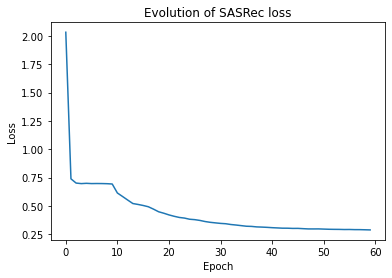

In [151]:
pd.Series(losses).plot(title='Evolution of SASRec loss', xlabel='Epoch', ylabel='Loss');